In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
import statsmodels  as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from typing import Literal
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as multi
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

# 1. Effect of treatment on Soil Ph over time Of ROCKFORD Crop year 2019.


# Question

**1.Affect Of Treatment on PH ?**

**2.Affect of Depth On Ph ?**

**3.Affect Of Time Series on Ph ?**

**4.Affect of interaction  Treatment and Depth On Ph ?**

**5. Affect of interaction  Of Treatment and Time Series On Ph ?**

**6. Affect of interaction of Depth and Time Series On Ph ?**

**7. Affect of interaction of Treatment, Depth and Time Series on Ph ?**

**Year Established 2019 Rockford.**
   
   Treatment have level of 9. Depth are level of 0-3, 3-6,6-12. Time series are consists of winter Wheat 2019, Spring Wheat 2019, winter wheat 2020, Spring wheat 2020 with 4 replication.**


In [55]:
df=pd.read_excel('Time Series.xlsx')

In [56]:
df


,Rep,Trt,Depth,WW19,SW19,WW20,SW20
0,1,1,0-3,3.96,4.02,4.03,4.29
1,2,1,0-3,3.81,4.05,4.17,4.02
2,3,1,0-3,3.83,4.05,4.16,4.05
3,4,1,0-3,3.78,3.96,4.07,4.22
4,1,1,3-6,3.69,3.72,3.80,3.98
...,...,...,...,...,...,...,...
103,4,9,3-6,3.81,3.73,3.96,4.41
104,1,9,6-12,4.08,4.18,5.53,3.83
105,2,9,6-12,3.94,4.13,5.02,3.92
106,3,9,6-12,4.19,4.10,4.80,4.09


In [6]:
df_melt=pd.melt(df.reset_index(),id_vars=['Rep','Trt','Depth'],value_vars=['WW19','SW19','WW20','SW20'])

In [7]:
df_melt

,Rep,Trt,Depth,variable,value
0,1,1,0-3,WW19,3.96
1,2,1,0-3,WW19,3.81
2,3,1,0-3,WW19,3.83
3,4,1,0-3,WW19,3.78
4,1,1,3-6,WW19,3.69
...,...,...,...,...,...
427,4,9,3-6,SW20,4.41
428,1,9,6-12,SW20,3.83
429,2,9,6-12,SW20,3.92
430,3,9,6-12,SW20,4.09


In [8]:
df_melt.columns=['Rep', 'Trt','Depth','Time_Series','Ph']
df=df_melt
df

,Rep,Trt,Depth,Time_Series,Ph
0,1,1,0-3,WW19,3.96
1,2,1,0-3,WW19,3.81
2,3,1,0-3,WW19,3.83
3,4,1,0-3,WW19,3.78
4,1,1,3-6,WW19,3.69
...,...,...,...,...,...
427,4,9,3-6,SW20,4.41
428,1,9,6-12,SW20,3.83
429,2,9,6-12,SW20,3.92
430,3,9,6-12,SW20,4.09


In [9]:

df_melt.Trt.value_counts()


1    48
2    48
3    48
4    48
5    48
6    48
7    48
8    48
9    48
Name: Trt, dtype: int64

In [10]:
from statsmodels.formula.api import ols

In [11]:
 formula= 'Ph~C(Trt)+C(Depth)+C(Time_Series)+C(Depth):C(Trt)+C(Depth):C(Time_Series)+C(Trt):C(Time_Series)+C(Trt):C(Depth):C(Time_Series)'
model=ols(formula,df).fit()

aov_table=sm.stats.anova_lm(model,typ=3)
print(aov_table.round(4))

                                 sum_sq     df         F  PR(>F)
Intercept                       64.6416    1.0  614.6027  0.0000
C(Trt)                          20.4239    8.0   24.2734  0.0000
C(Depth)                         0.2426    2.0    1.1533  0.3169
C(Time_Series)                   0.2142    3.0    0.6789  0.5655
C(Depth):C(Trt)                 12.4901   16.0    7.4221  0.0000
C(Depth):C(Time_Series)          3.7875    6.0    6.0019  0.0000
C(Trt):C(Time_Series)            5.1795   24.0    2.0519  0.0031
C(Trt):C(Depth):C(Time_Series)   4.9802   48.0    0.9865  0.5032
Residual                        33.1305  315.0       NaN     NaN


# Answer From ANOVA Table

**1.Affect Of Treatment on PH ?**

1.Null Hypothesis:There is no difference in group means at any level of the Treatment variable. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9     
2. Alternative Hypothesis: There is at least one difference in group means at any level of treatment.
     μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9
**ANSWER**

**From Anova Table, It can be seen that P value for Treatment is 0.000.Thus, we reject null hypothesis and accept alternative hypothesis. It indicate that mean of the ph differ significantly with respect to Treatment. SO, there was significant effect of  Treatment on Ph.**
     
     

**Main effect plot**

<AxesSubplot:xlabel='Trt', ylabel='Ph'>

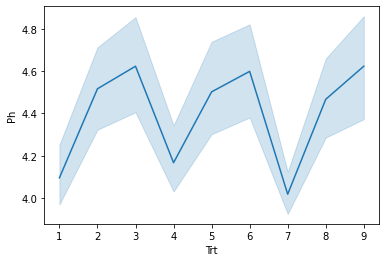

In [48]:
sns.lineplot(x='Trt', y='Ph', data=df_melt)


# Post-Hoc Comparisons, Treatment

tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['Ph'],
 groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**This code cannot be run because of the missing data in PH VALUE FOR WW20 and SW20.**

**2.Influnce of Depth on PH?**

1.Null Hypothesis:There is no difference in group means at any level of the Depth variable. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9     
2. Alternative Hypothesis: There is at least one difference in group means at any level of Depth.
     μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9

**From Anova Table, It can be seen that P value for Treatment is 0.3169. Thus, we accept null hypothesis and reject alternative hypothesis. It indicate that mean Ph depth didnot differ significantly. So there was not significant influnce of depth on ph.**

<AxesSubplot:xlabel='Depth', ylabel='Ph'>

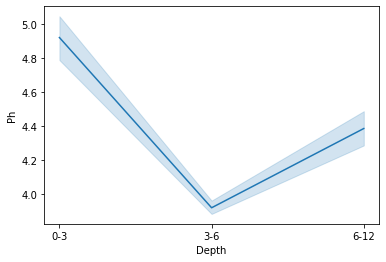

In [49]:
sns.lineplot(x='Depth', y='Ph', data=df_melt)

**3.Affect Of Time Series on Ph ?**

1.Null Hypothesis:There is no difference in group means at any level of the Time series variable. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9     
2. Alternative Hypothesis: There is at least one difference in group means at any level of Depth.
     μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9
     
**From Anova Table, It can be seen that P value for Time Series is 0.5655.Thus we accept null hypothesis and reject alternative hypothesis. It indicate that mean Ph of time series didnot differ significantly.So,there was not significant influence of time series on Ph.**     

<AxesSubplot:xlabel='Time_Series', ylabel='Ph'>

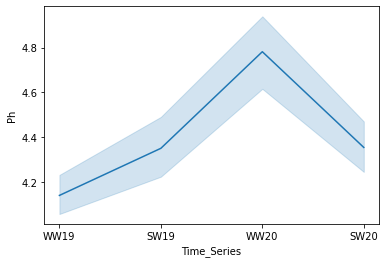

In [28]:
   sns.lineplot(x='Time_Series', y='Ph', data=df_melt)

**4.Affect of interaction Treatment and Depth On Ph ?**

1.Null Hypothesis:There is no difference in  influence of intreaction between Treatment and depth on PH. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9

2. Alternative Hypothesis: There is at least one difference in in  influence of intreaction between Treatment and depth on PH. μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9

**From Anova Table,  We begin by interpreting the interaction term and see that it is statistically significant,yielding a very small p-value (p=0.000). This suggests that any effect of Treatment on Ph is not consistent across Depth, and that any effect of Depth is not consistent across Treatment.** Ideally, interaction terms should be interpreted first over and above main effect terms. 

**Why?**

Because they tell more of the “story” of the data. While it is technically not completely incorrect to interpret main effects in the context of an interaction, in light of an interaction, main effect terms will be misleading as they do not tell you the full story. 

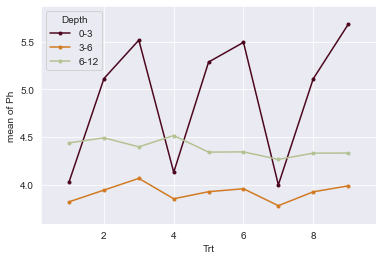

In [94]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df_melt['Trt'], trace=df_melt['Depth'], response=df_melt['Ph'],
 colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()


**Post Hoc Test is not possible due to missing Data in WW20 and SW19**

**5. Affect of interaction Of Treatment and Time Series On Ph ?**

1.Null Hypothesis:There is no difference in influence of intreaction between Treatment and Time series on PH. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9 

2. Alternative Hypothesis: There is at least one difference in  influence of intreaction between Treatment and Time series on PH. μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9

**From Anova Table, We begin by interpreting the interaction term and see that it is statistically significant,yielding a very small p-value (p=0.000). This suggests that any effect of Treatment on Ph is not consistent Time Series, and that any effect of Time Series is not consistent across Treatment.** Ideally, interaction terms should be interpreted first over and above main effect terms.

**Why?**

Because they tell more of the “story” of the data. While it is technically not completely incorrect to interpret main effects in the context of an interaction, in light of an interaction, main effect terms will be misleading as they do not tell us the full story.

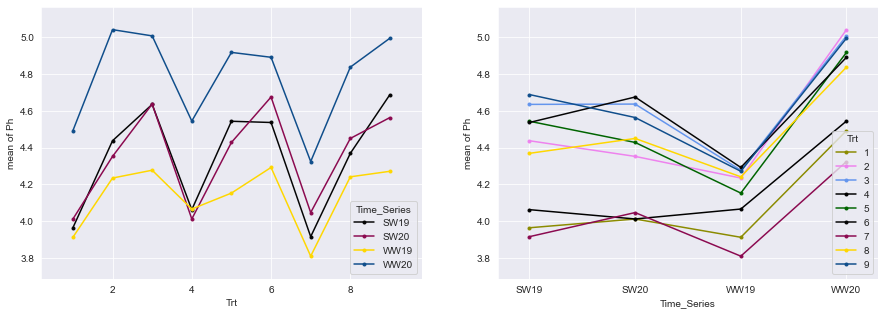

In [142]:
f , axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
sns.set_style("darkgrid")
fig1 = interaction_plot(x=df_melt['Trt'], trace=df_melt['Time_Series'], response=df_melt['Ph'],ax=axes[0],colors=['#050505','#8B0A50', '#FFD700','#104E8B'])
fig2 = interaction_plot(x=df_melt['Time_Series'], trace=df_melt['Trt'], response=df_melt['Ph'],ax=axes[1],colors=['#8B8B00','#EE82EE','#6495ED','#000000','#006400','#050505','#8B0A50', '#FFD700','#104E8B'])
plt.show()

**Post Hoc Test is not possible due to missing Data in WW20 and SW19**

**6. Affect of interaction of Depth and Time Series On Ph ?**

1.Null Hypothesis:There is no difference in influence of intreaction between Depth and Time series on PH. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9

Alternative Hypothesis: There is at least one difference in influence of intreaction between Depth and Time series on PH. μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9

From Anova Table, We begin by interpreting the interaction term and see that it is statistically significant,yielding a very small p-value (p=0.000). This suggests that any effect of Treatment on Ph is not consistent Time Series, and that any effect of Time Series is not consistent across Treatment.

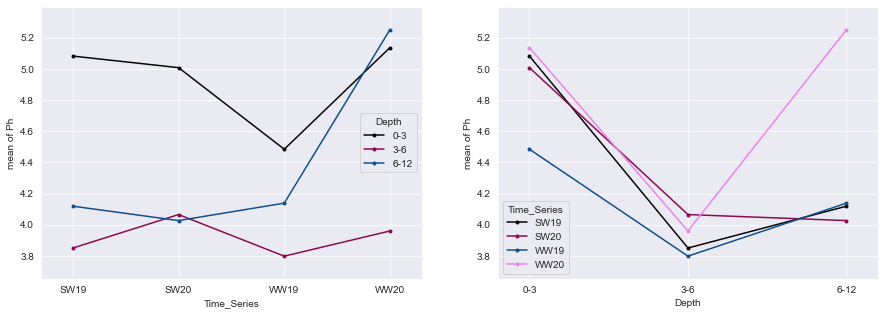

In [146]:
f , axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
sns.set_style("darkgrid")
fig = interaction_plot(x=df_melt['Time_Series'],ax=axes[0], trace=df_melt['Depth'], response=df_melt['Ph'],
 colors=['#050505','#8B0A50', '#104E8B'])
fig = interaction_plot(x=df_melt['Depth'],ax=axes[1], trace=df_melt['Time_Series'], response=df_melt['Ph'],
 colors=['#050505','#8B0A50', '#104E8B','#EE82EE'])
plt.show()

**Multiple comparision Post hoc Test is not possible due to missing Data in WW20 and SW20**

**7. Affect of interaction of Treatment, Depth and Time Series on Ph ?**

1.Null Hypothesis:There is no difference in influence of intreaction between Treatment, Depth,and Time series on PH. μ1=μ2=μ3=μ4=μ5=μ6=μ7=μ8=μ9

Alternative Hypothesis: There is at least one difference in influence of intreaction between Tretament,Depth and Time series on PH. μ1∉μ2∉μ3∉μ4∉μ5∉μ6∉μ7∉μ8∉μ9

From Anova Table, We begin by interpreting the interaction term and see that it is not statistically significant,yielding a ll p-value (p=0.5032).

**This suggests that any effect of Treatment on Ph is consistent Depth and Time Series.**
**This suggests that any effect of Depth on Ph is consistent Treatment and Time Series.**
**This suggests that any effect of Time series on Ph is consistent Depth and Time Treatment.**

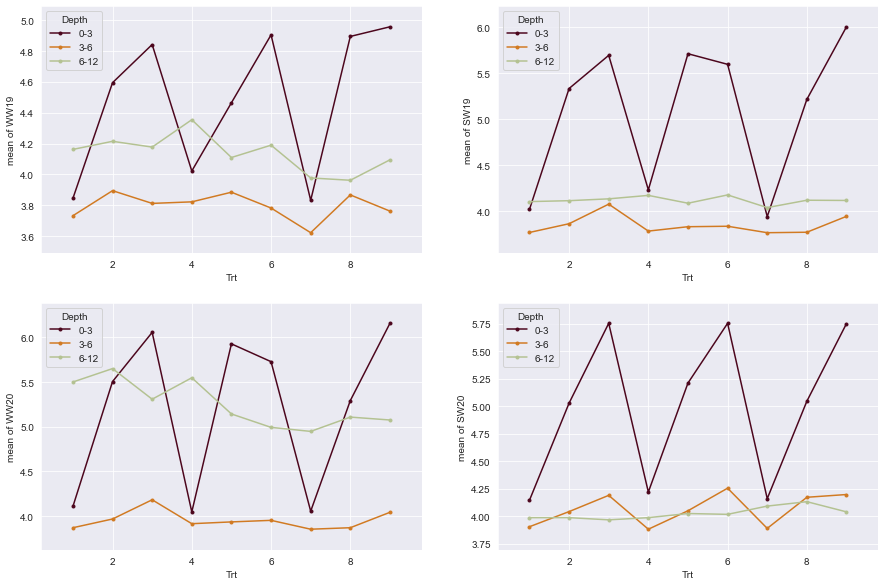

In [66]:
 f , axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
sns.set_style("darkgrid")
fig1 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['WW19'], ax=axes[0,0],colors=['#4c061d','#d17a22', '#b4c292'] )
fig2 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SW19'],ax=axes[0,1],colors=['#4c061d','#d17a22', '#b4c292']  )
fig3 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['WW20'],ax=axes[1,0],colors=['#4c061d','#d17a22', '#b4c292']  )
fig4= interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SW20'], ax=axes[1,1],colors=['#4c061d','#d17a22', '#b4c292'] )
plt.show()

**Post hoc test is not possible due to missing Data.**